In [59]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('fastf1_cache')

In [124]:
session = fastf1.get_session(2022, 'Monza', 'R')
session.load(telemetry=True)

core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '63', '55', '44', '11', '4', '10', '45', '24', '31', '47', '77', '22', '6', '20', '3', '18', '14', '5']


In [98]:
df = session.laps
df.info()

<class 'fastf1.core.Laps'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                926 non-null    timedelta64[ns]
 1   DriverNumber        926 non-null    object         
 2   LapTime             868 non-null    timedelta64[ns]
 3   LapNumber           926 non-null    int64          
 4   PitOutTime          58 non-null     timedelta64[ns]
 5   PitInTime           41 non-null     timedelta64[ns]
 6   Sector1Time         887 non-null    timedelta64[ns]
 7   Sector2Time         926 non-null    timedelta64[ns]
 8   Sector3Time         924 non-null    timedelta64[ns]
 9   Sector1SessionTime  887 non-null    timedelta64[ns]
 10  Sector2SessionTime  926 non-null    timedelta64[ns]
 11  Sector3SessionTime  924 non-null    timedelta64[ns]
 12  SpeedI1             769 non-null    float64        
 13  SpeedI2             926 non-null    float64   

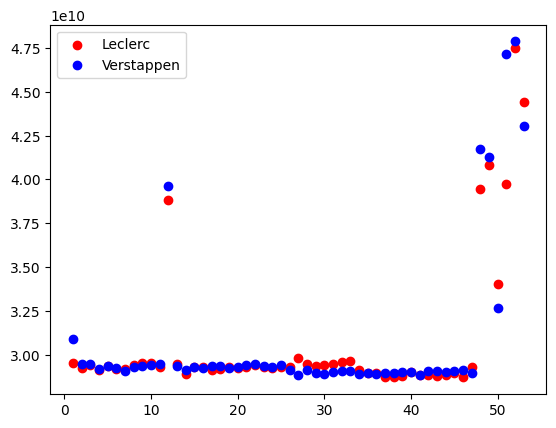

In [51]:
lec = df[df["DriverNumber"] == "16"]
ver = df[df["DriverNumber"] == "1"]
plt.scatter(lec["LapNumber"], lec["Sector2Time"], c="red")
plt.scatter(ver["LapNumber"], ver["Sector2Time"], c="blue")
plt.legend(["Leclerc", "Verstappen"])
plt.show()

## Abstände

In [125]:
lap_df_lec = session.laps.pick_driver("16")
lap_df_ver = session.laps.pick_driver("1")

for i in range(1, lap_df_lec["LapNumber"].max()):
    lapdatac = lap_df_lec[lap_df_lec["LapNumber"]==i]
    lapdatac = lapdatac.get_car_data().add_driver_ahead()
    if i == 1:
        lapdata = lapdatac
    else:
        lapdata = pd.concat([lapdata, lapdatac], axis=0)

#car_df_ver = session.car_data["1"].add_driver_ahead()

In [126]:
lap_df_lec["LapNumber"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [127]:
lapdata

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,DriverAhead,DistanceToDriverAhead
0,2022-09-11 13:03:28.455,10232,0,1,36,True,1,car,0 days 00:00:00.077000,0 days 01:02:28.214000,,NaN
1,2022-09-11 13:03:28.735,10237,0,1,36,False,1,car,0 days 00:00:00.357000,0 days 01:02:28.494000,,NaN
2,2022-09-11 13:03:28.935,8977,5,1,35,False,1,car,0 days 00:00:00.557000,0 days 01:02:28.694000,47,0.000000
3,2022-09-11 13:03:29.214,6877,11,1,35,False,1,car,0 days 00:00:00.836000,0 days 01:02:28.973000,1,0.021944
4,2022-09-11 13:03:29.454,5337,23,1,35,False,1,car,0 days 00:00:01.076000,0 days 01:02:29.213000,77,0.232222
...,...,...,...,...,...,...,...,...,...,...,...,...
538,2022-09-11 14:21:44.829,9805,188,5,37,False,1,car,0 days 00:02:22.175000,0 days 02:20:44.588000,1,121.355000
539,2022-09-11 14:21:45.069,9876,186,5,26,False,1,car,0 days 00:02:22.415000,0 days 02:20:44.828000,1,120.488333
540,2022-09-11 14:21:45.269,9654,184,5,8,False,1,car,0 days 00:02:22.615000,0 days 02:20:45.028000,1,119.766111
541,2022-09-11 14:21:45.429,9475,183,5,0,False,1,car,0 days 00:02:22.775000,0 days 02:20:45.188000,1,119.188333


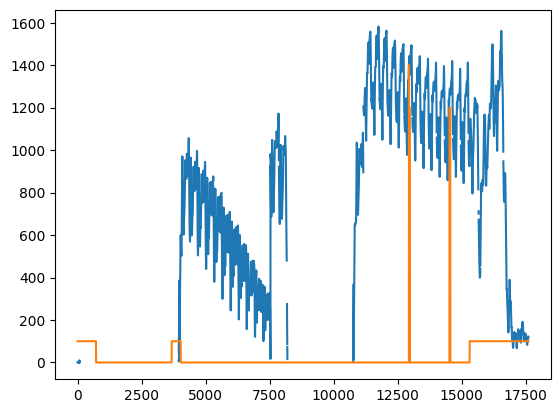

In [131]:
plt.plot(np.linspace(0, 17603, 17604), lapdata["DistanceToDriverAhead"])
plt.plot(np.linspace(0, 17603, 17604), 100*lapdata["DRS"])

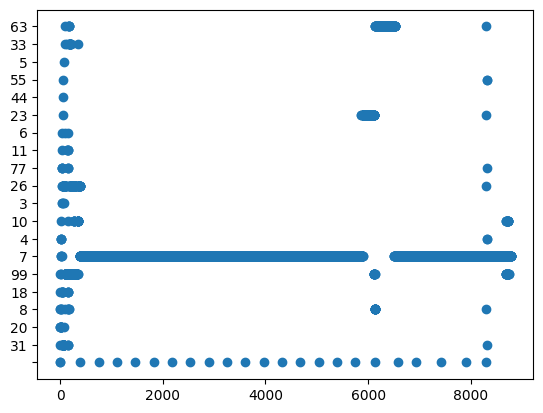

In [118]:
plt.scatter(np.linspace(0, 8778, 8779), lapdata["DriverAhead"])

## Track Position

In [139]:
lec_pos = session.pos_data["16"]
ver_pos = session.pos_data["1"]

In [151]:
lap1_lec = lec_pos.iloc[15000:15445,:]
lap1_ver = ver_pos.iloc[15000:15445,:]

In [159]:
lap1_comb = lap1_lec
lap1_comb["X2"] = lap1_ver["X"]
lap1_comb["Y2"] = lap1_ver["Y"]
lap1_comb["distance"] = np.sqrt((lap1_comb["X"]-lap1_comb["X2"])**2, (lap1_comb["Y"]-lap1_comb["Y2"])**2)
lap1_comb

C:\Users\Pius\AppData\Local\Temp\ipykernel_35952\142587541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap1_comb["X2"] = lap1_ver["X"]
C:\Users\Pius\AppData\Local\Temp\ipykernel_35952\142587541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lap1_comb["Y2"] = lap1_ver["Y"]
C:\Users\Pius\AppData\Local\Temp\ipykernel_35952\142587541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Date,Status,X,Y,Z,Source,Time,SessionTime,X2,Y2,distance
15000,2022-09-11 13:05:53.957,OnTrack,4504,8016,1885,pos,0 days 01:04:53.716000,0 days 01:04:53.716000,6201,9491,1697
15001,2022-09-11 13:05:54.297,OnTrack,4207,7758,1892,pos,0 days 01:04:54.056000,0 days 01:04:54.056000,5908,9236,1701
15002,2022-09-11 13:05:54.677,OnTrack,4040,7613,1896,pos,0 days 01:04:54.436000,0 days 01:04:54.436000,5742,9092,1702
15003,2022-09-11 13:05:54.837,OnTrack,3940,7525,1898,pos,0 days 01:04:54.596000,0 days 01:04:54.596000,5639,9002,1699
15004,2022-09-11 13:05:55.137,OnTrack,3752,7362,1901,pos,0 days 01:04:54.896000,0 days 01:04:54.896000,5446,8835,1694
...,...,...,...,...,...,...,...,...,...,...,...
15440,2022-09-11 13:07:49.476,OnTrack,-1393,-905,1871,pos,0 days 01:06:49.235000,0 days 01:06:49.235000,-1497,-2872,104
15441,2022-09-11 13:07:49.836,OnTrack,-1368,-600,1872,pos,0 days 01:06:49.595000,0 days 01:06:49.595000,-1491,-2591,123
15442,2022-09-11 13:07:50.036,OnTrack,-1353,-429,1873,pos,0 days 01:06:49.795000,0 days 01:06:49.795000,-1486,-2433,133
15443,2022-09-11 13:07:50.116,OnTrack,-1347,-361,1873,pos,0 days 01:06:49.875000,0 days 01:06:49.875000,-1484,-2370,137


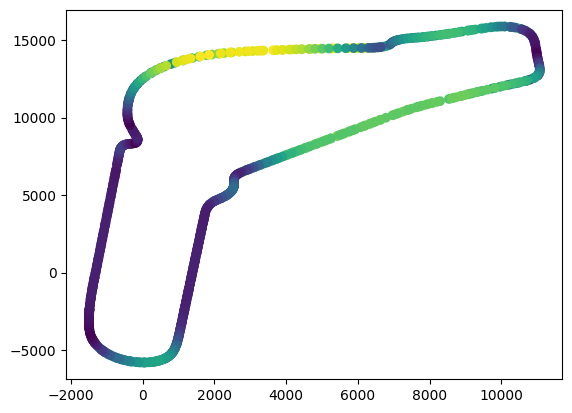

In [161]:
plt.scatter(lap1_lec["X"], lap1_lec["Y"], c=lap1_comb["distance"])
plt.scatter(lap1_ver["X"], lap1_ver["Y"], c=lap1_comb["distance"])

## DRS

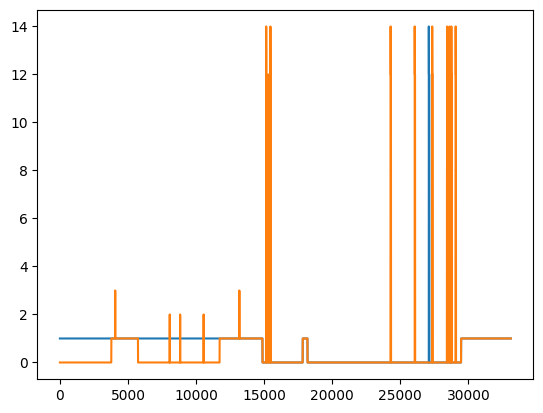

In [68]:
plt.plot(np.linspace(0,33117, 33118), car_df_lec["DRS"])
plt.plot(np.linspace(0,33117, 33118), car_df_ver["DRS"])

In [75]:
lec_pos = session.pos_data["16"]
ver_pos = session.pos_data["1"]

In [78]:
lec_pos.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 33762 entries, 0 to 33761
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Date         33762 non-null  datetime64[ns] 
 1   Status       33762 non-null  object         
 2   X            33762 non-null  int64          
 3   Y            33762 non-null  int64          
 4   Z            33762 non-null  int64          
 5   Source       33762 non-null  object         
 6   Time         33762 non-null  timedelta64[ns]
 7   SessionTime  33762 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(3), object(2), timedelta64[ns](2)
memory usage: 2.1+ MB


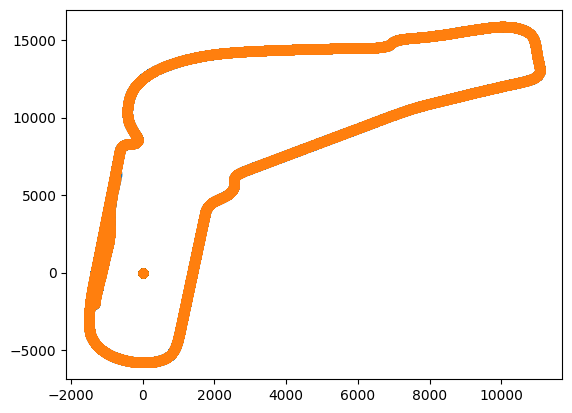

In [81]:
plt.scatter(lec_pos["X"], lec_pos["Y"])
plt.scatter(ver_pos["X"], ver_pos["Y"])

In [88]:
test = session.load_laps(with_telemetry=True)

c:\Users\Pius\OneDrive - bwedu\Python\F1_Dashboard\.venv\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Italian Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['10', '55', '18', '4

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:35:00.818000,10,NaT,1,0 days 00:00:06.745000,NaT,NaT,0 days 00:00:31.058000,0 days 00:00:29.669000,NaT,...,SOFT,4.0,False,1,0 days 00:33:28.079000,AlphaTauri,GAS,1,False,2020-09-06 13:13:28.275
1,0 days 00:36:27.957000,10,0 days 00:01:27.139000,2,NaT,NaT,0 days 00:00:28.216000,0 days 00:00:30.088000,0 days 00:00:28.835000,0 days 00:35:29.034000,...,SOFT,5.0,False,1,0 days 00:35:00.818000,AlphaTauri,GAS,1,True,2020-09-06 13:15:01.014
2,0 days 00:37:54.493000,10,0 days 00:01:26.536000,3,NaT,NaT,0 days 00:00:28.147000,0 days 00:00:29.608000,0 days 00:00:28.781000,0 days 00:36:56.104000,...,SOFT,6.0,False,1,0 days 00:36:27.957000,AlphaTauri,GAS,1,True,2020-09-06 13:16:28.153
3,0 days 00:39:20.748000,10,0 days 00:01:26.255000,4,NaT,NaT,0 days 00:00:28.078000,0 days 00:00:29.545000,0 days 00:00:28.632000,0 days 00:38:22.571000,...,SOFT,7.0,False,1,0 days 00:37:54.493000,AlphaTauri,GAS,1,True,2020-09-06 13:17:54.689
4,0 days 00:40:46.944000,10,0 days 00:01:26.196000,5,NaT,NaT,0 days 00:00:27.948000,0 days 00:00:29.540000,0 days 00:00:28.708000,0 days 00:39:48.696000,...,SOFT,8.0,False,1,0 days 00:39:20.748000,AlphaTauri,GAS,1,True,2020-09-06 13:19:20.944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,0 days 00:36:33.258000,5,0 days 00:01:27.933000,2,NaT,NaT,0 days 00:00:28.189000,0 days 00:00:30.218000,0 days 00:00:29.526000,0 days 00:35:33.514000,...,HARD,2.0,True,1,0 days 00:35:05.325000,Ferrari,VET,1,True,2020-09-06 13:15:05.521
922,0 days 00:38:00.904000,5,0 days 00:01:27.646000,3,NaT,NaT,0 days 00:00:28.401000,0 days 00:00:30.037000,0 days 00:00:29.208000,0 days 00:37:01.659000,...,HARD,3.0,True,1,0 days 00:36:33.258000,Ferrari,VET,1,True,2020-09-06 13:16:33.454
923,0 days 00:39:28.011000,5,0 days 00:01:27.107000,4,NaT,NaT,0 days 00:00:28.331000,0 days 00:00:29.581000,0 days 00:00:29.195000,0 days 00:38:29.235000,...,HARD,4.0,True,1,0 days 00:38:00.904000,Ferrari,VET,1,True,2020-09-06 13:18:01.100
924,0 days 00:40:56.331000,5,0 days 00:01:28.320000,5,NaT,NaT,0 days 00:00:28.584000,0 days 00:00:29.719000,0 days 00:00:30.017000,0 days 00:39:56.595000,...,HARD,5.0,True,1,0 days 00:39:28.011000,Ferrari,VET,1,True,2020-09-06 13:19:28.207


In [102]:
tel_df_bot = session.laps.pick_driver("BOT").get_telemetry()
tel_df_ham = session.laps.pick_driver("HAM").get_telemetry()